In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the daily activity dataset
daily_activity = pd.read_csv('dailyActivity_merged.csv')

# Get a quick overview of the data
print("Daily Activity Data Info:")
daily_activity.info()

# Display the first 5 rows
print("\nFirst 5 rows of Daily Activity Data:")
print(daily_activity.head())

Daily Activity Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null 

In [2]:
# Check for missing values
print("\nMissing values in each column:")
print(daily_activity.isnull().sum())

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {daily_activity.duplicated().sum()}")
# If there were duplicates, you would remove them with: daily_activity.drop_duplicates(inplace=True)

# Convert 'ActivityDate' from an object (text) to a datetime format
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y')

# Verify the change
print("\nData Info after converting ActivityDate:")
daily_activity.info()


Missing values in each column:
Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

Number of duplicate rows: 0

Data Info after converting ActivityDate:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        457 non-null    int64         
 1   ActivityDate              457 non-null    datetime64[ns]
 2   TotalSteps                457 non-null    int64         
 3   TotalDistance 

In [3]:
# Load the minute-level sleep data
sleep_data = pd.read_csv('minuteSleep_merged.csv')

# The 'date' column contains both date and time. Let's convert it to datetime.
sleep_data['date'] = pd.to_datetime(sleep_data['date'])

# Extract just the date part for merging
sleep_data['SleepDate'] = sleep_data['date'].dt.date

# Calculate total minutes asleep per user per day
# The 'value' column: 1 = asleep, 2 = restless, 3 = awake. We'll count 1 and 2 as sleep.
daily_sleep = sleep_data[sleep_data['value'].isin([1, 2])].groupby(['Id', 'SleepDate']).size().reset_index(name='TotalMinutesAsleep')

# Convert 'SleepDate' to datetime so we can merge
daily_sleep['SleepDate'] = pd.to_datetime(daily_sleep['SleepDate'])


# Now, merge the daily activity data with our new daily sleep data
# We rename the date columns to be consistent before merging
daily_activity.rename(columns={'ActivityDate': 'Date'}, inplace=True)
daily_sleep.rename(columns={'SleepDate': 'Date'}, inplace=True)

# Merge the two dataframes
merged_data = pd.merge(daily_activity, daily_sleep, on=['Id', 'Date'], how='left')

print("\nFirst 5 rows of Merged Data (Activity + Sleep):")
print(merged_data.head())


First 5 rows of Merged Data (Activity + Sleep):
           Id       Date  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366 2016-03-25       11004           7.11             7.11   
1  1503960366 2016-03-26       17609          11.55            11.55   
2  1503960366 2016-03-27       12736           8.53             8.53   
3  1503960366 2016-03-28       13231           8.93             8.93   
4  1503960366 2016-03-29       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryAc

In [4]:
# Get descriptive statistics for the key columns
print("\nDescriptive Statistics for Merged Data:")
print(merged_data[['TotalSteps', 'TotalDistance', 'SedentaryMinutes', 'TotalMinutesAsleep', 'Calories']].describe())


Descriptive Statistics for Merged Data:
         TotalSteps  TotalDistance  SedentaryMinutes  TotalMinutesAsleep  \
count    457.000000     457.000000        457.000000          199.000000   
mean    6546.562363       4.663523        995.282276          425.391960   
std     5398.493064       4.082072        337.021404          149.194867   
min        0.000000       0.000000         32.000000           13.000000   
25%     1988.000000       1.410000        728.000000          378.500000   
50%     5986.000000       4.090000       1057.000000          439.000000   
75%    10198.000000       7.160000       1285.000000          503.500000   
max    28497.000000      27.530001       1440.000000          946.000000   

          Calories  
count   457.000000  
mean   2189.452954  
std     815.484523  
min       0.000000  
25%    1776.000000  
50%    2062.000000  
75%    2667.000000  
max    4562.000000  


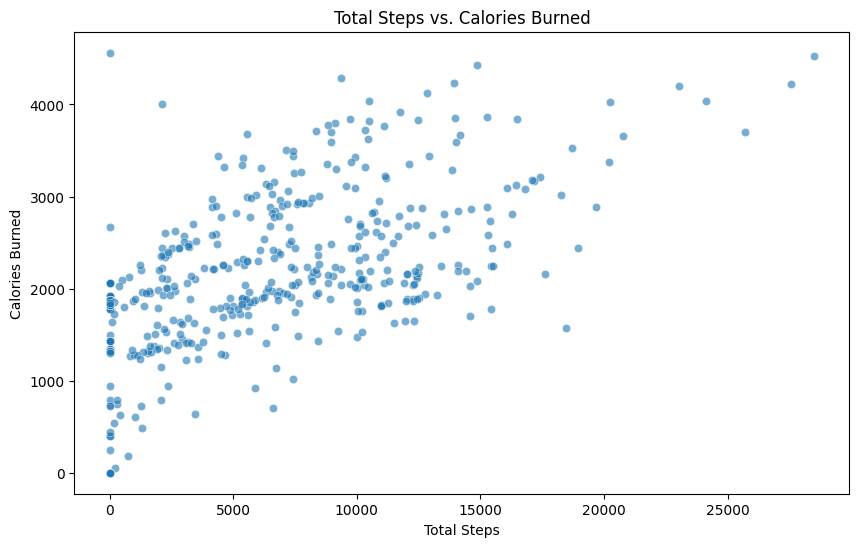

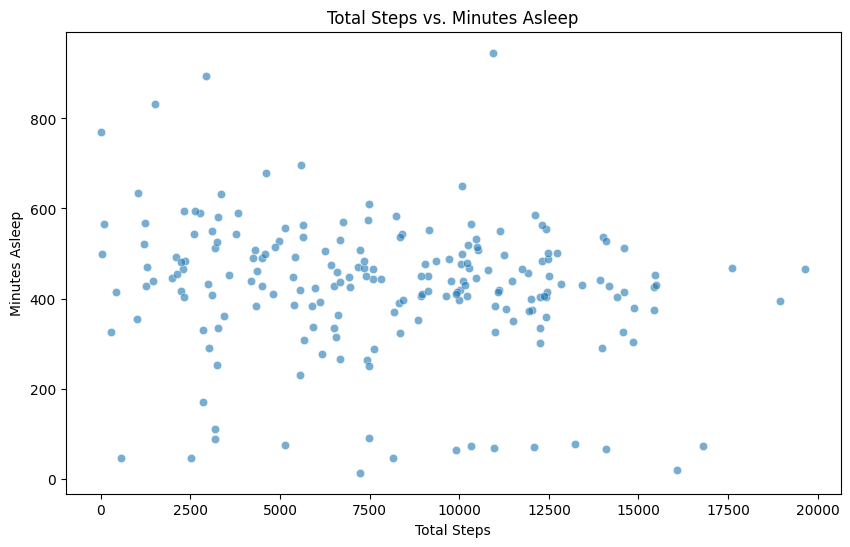

In [5]:
# Create a scatter plot to see the relationship between steps taken and calories burned
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='TotalSteps', y='Calories', alpha=0.6)
plt.title('Total Steps vs. Calories Burned')
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.show()

# Create a scatter plot to see the relationship between steps taken and sleep
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='TotalSteps', y='TotalMinutesAsleep', alpha=0.6)
plt.title('Total Steps vs. Minutes Asleep')
plt.xlabel('Total Steps')
plt.ylabel('Minutes Asleep')
plt.show()

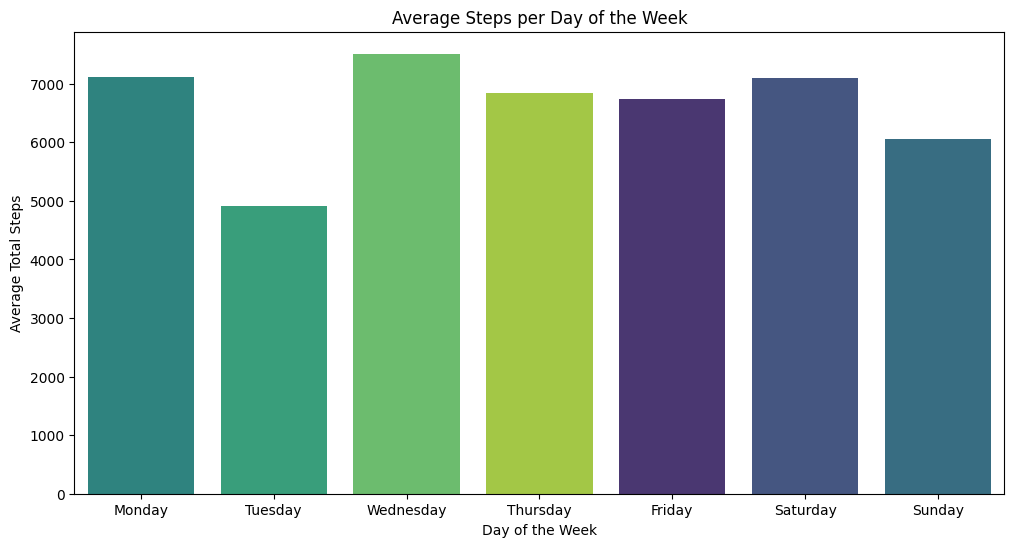

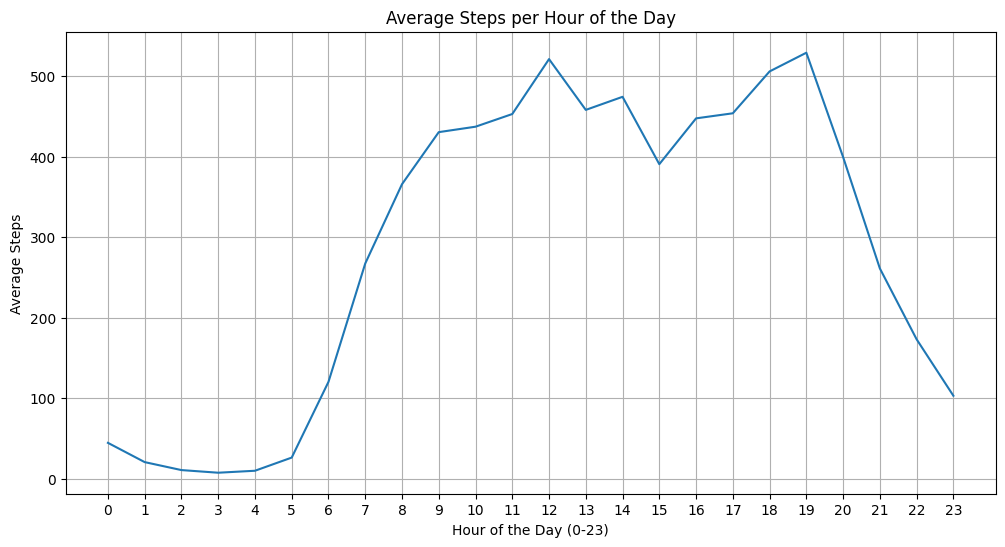

In [14]:
# Add a 'DayOfWeek' column to our data
merged_data['DayOfWeek'] = merged_data['Date'].dt.day_name()

# Define the order for the days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Bar chart of average steps per day of the week (Warning fixed)
plt.figure(figsize=(12, 6))
sns.barplot(data=merged_data, x='DayOfWeek', y='TotalSteps', order=day_order, palette='viridis', errorbar=None, hue='DayOfWeek', legend=False)
plt.title('Average Steps per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Steps')
plt.show()

# --- FINAL CORRECTED PART ---
# Load hourly data to see when users are most active
hourly_steps = pd.read_csv('hourlySteps_merged.csv')

# Use format='mixed' to handle the inconsistent date formats in the column
hourly_steps['ActivityHour'] = pd.to_datetime(hourly_steps['ActivityHour'], format='mixed')
hourly_steps['Hour'] = hourly_steps['ActivityHour'].dt.hour

# Line chart of average steps per hour
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_steps, x='Hour', y='StepTotal', errorbar=None)
plt.title('Average Steps per Hour of the Day')
plt.xlabel('Hour of the Day (0-23)')
plt.ylabel('Average Steps')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

C:\Users\rushi\AppData\Local\Temp\ipykernel_13688\3472637326.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='plasma', order=['Sedentary', 'Lightly Active', 'Fairly Active', 'Very Active'])


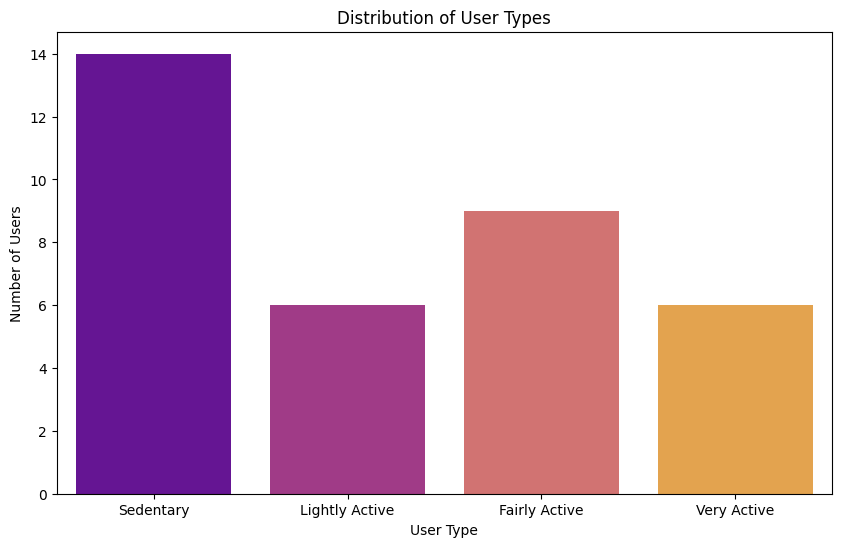

UserType
Fairly Active     456.655556
Lightly Active    361.064516
Sedentary         448.478261
Very Active       366.593750
Name: TotalMinutesAsleep, dtype: float64


In [13]:
# 1. Calculate the average daily steps for each user
user_avg_steps = merged_data.groupby('Id')['TotalSteps'].mean().reset_index()

# 2. Define a function to categorize users
def categorize_user(steps):
    if steps < 5000:
        return 'Sedentary'
    elif 5000 <= steps < 7500:
        return 'Lightly Active'
    elif 7500 <= steps < 10000:
        return 'Fairly Active'
    else:
        return 'Very Active'

# 3. Apply the function to create a 'UserType' column
user_avg_steps['UserType'] = user_avg_steps['TotalSteps'].apply(categorize_user)

# 4. Visualize the distribution of user types
user_type_counts = user_avg_steps['UserType'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='plasma', order=['Sedentary', 'Lightly Active', 'Fairly Active', 'Very Active'])
plt.title('Distribution of User Types')
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.show()

# This is the last line from your code block and it's the correct next step
merged_data_with_usertype = pd.merge(merged_data, user_avg_steps[['Id', 'UserType']], on='Id', how='left')

# You can now analyze the habits of each group, for example:
print(merged_data_with_usertype.groupby('UserType')['TotalMinutesAsleep'].mean())
